In [8]:
import sys
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

from numpy.random import seed
from tensorflow import set_random_seed
import scipy as sp
import scipy.io as spio
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
from tensorflow.python import keras
from sklearn.model_selection import train_test_split ,KFold
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPooling1D, Reshape, GlobalAveragePooling1D
from tensorflow.python.keras.utils import np_utils
from numpy import mean
from numpy import std
import pandas as pd
from scipy import stats
from scipy.stats import zscore
from scipy import stats
from sklearn import metrics
import keras.backend as k
import seaborn as sns
from sklearn import preprocessing
from numpy import mean
from numpy import std

dataset = np.loadtxt("datalast.csv",delimiter=",")
X = dataset[:,0:177]
y = dataset[:,178]

dataset=stats.zscore(dataset)


print()
   # Normalize Training Data 
   # std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)
 
"""
def feature_normalize(dataset):

    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma
"""


LABELS = ["0",

          "1",

          "2",

          "3",

          "4"]

 

def show_confusion_matrix(validations, predictions):
 

    #matrix = metrics.confusion_matrix(y_test_hot, predictions)

    plt.figure(figsize=(6, 4))

    sns.heatmap(c,

                cmap="coolwarm",

                linecolor='white',

                linewidths=1,

                xticklabels=LABELS,

                yticklabels=LABELS,

                annot=True,

                fmt="d")

    plt.title("Confusion Matrix")

    plt.ylabel("True Label")

    plt.xlabel("Predicted Label")

    plt.show()
    
def counts_from_confusion(confusion):

    counts_list=[]
    
# Iterate through classes and store the counts

    for i in range(confusion.shape[0]):

        tp = confusion[i, i]
        
        fn_mask = np.zeros(confusion.shape)

        fn_mask[i, :] = 1

        fn_mask[i, i] = 0

        fn = np.sum(np.multiply(confusion, fn_mask))



        fp_mask = np.zeros(confusion.shape)

        fp_mask[:, i] = 1

        fp_mask[i, i] = 0

        fp = np.sum(np.multiply(confusion, fp_mask))
        
        tn_mask = 1 - (fn_mask + fp_mask)

        tn_mask[i, i] = 0

        tn = np.sum(np.multiply(confusion, tn_mask))



        counts_list.append({'Class': i,

                           'TP': tp,
   
                           'FN': fn,

                           'FP': fp,

                           'TN': tn})
         
        print('sensitivity', tp / tp + fn)

        print('specificity', tn / tn + fp)

    return counts_list


 


"""
dataset = dataset.dropna(how='any') # drop nan entries
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)] # remove outliers
print(dataset.describe())
dataset = dataset.apply(zscore) # Normalization
print(dataset.describe())

def feature_normalize(dataset):

    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma

feature_normalize(dataset)
"""

"\ndataset = dataset.dropna(how='any') # drop nan entries\ndataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)] # remove outliers\nprint(dataset.describe())\ndataset = dataset.apply(zscore) # Normalization\nprint(dataset.describe())\n\ndef feature_normalize(dataset):\n\n    mu = np.mean(dataset, axis=0)\n    sigma = np.std(dataset, axis=0)\n    return (dataset - mu)/sigma\n\nfeature_normalize(dataset)\n"

In [9]:
model_m = Sequential()
model_m.add(Conv1D(60, 10, activation='relu', input_shape=(177,1)))
model_m.add(Conv1D(60, 10, activation='relu'))
model_m.add(MaxPooling1D(2))
model_m.add(Dropout(0.05))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(2))
model_m.add(Dropout(0.15))
model_m.add(Conv1D(50, 5, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.05))
model_m.add(Dense(5, activation='softmax'))
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 168, 60)           660       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 159, 60)           36060     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 79, 60)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 79, 60)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 70, 100)           60100     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 61, 100)           100100    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 30, 100)           0         
__________

In [10]:
print("Number of columns in the dataframe: %i" % (X.shape[1]))
print("Number of rows in the dataframe: %i\n" % (X.shape[0]))
print("\n--- Create neural network model ---\n")
print(model_m.summary())
cvscores = []
j=1
kf=KFold(n_splits=2, random_state=None, shuffle=False)

scores = list()
# summarize scores
#def summarize_results(scores):
  #  m, s = mean(scores), std(scores)
 #   print('Accuracy: %.3f%%(+/-%.3f)' % (m ,s) )


Number of columns in the dataframe: 177
Number of rows in the dataframe: 11500


--- Create neural network model ---

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 168, 60)           660       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 159, 60)           36060     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 79, 60)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 79, 60)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 70, 100)           60100     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 61, 100)           100100    
________________________


Fold  1 

Train Index:  (5750,) 

Test Index:  (5750,)

--- Reshape data to be accepted by Keras ---

(5750, 177, 1)
(5750, 5)

--- Fit the model ---

Train on 4600 samples, validate on 1150 samples
Epoch 1/4
4600/4600 [==============================] - 1s 267us/step - loss: 3.7969 - acc: 0.2259 - val_loss: 1.4290 - val_acc: 0.2052
Epoch 2/4
4600/4600 [==============================] - 0s 106us/step - loss: 1.4184 - acc: 0.2493 - val_loss: 1.3327 - val_acc: 0.2774
Epoch 3/4
4600/4600 [==============================] - 0s 100us/step - loss: 1.2983 - acc: 0.3152 - val_loss: 1.2548 - val_acc: 0.3713
Epoch 4/4
4600/4600 [==============================] - 0s 99us/step - loss: 1.2324 - acc: 0.3813 - val_loss: 1.2413 - val_acc: 0.4313
Confusion matrix:
 [[921  57   0 189   0]
 [293 811   0  29  12]
 [250 825   0  58  16]
 [121  42   0 911  30]
 [294 132   0 720  39]]
sensitivity 247.0
specificity 959.0
sensitivity 335.0
specificity 1057.0
sensitivity nan
specificity 1.0
sensitivity 194.0
spe

/home/jojo/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: invalid value encountered in long_scalars


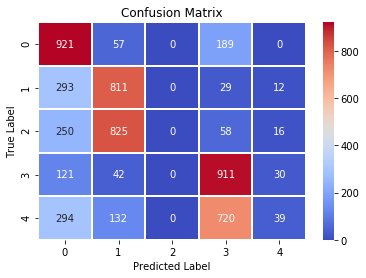


--- evaluate the model ---

5750/5750 [==============================] - 0s 53us/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [11]:

for train_index, test_index in kf.split(X):
    print('\nFold ',j, "\n")
    print("Train Index: ", train_index.shape, "\n")
    print("Test Index: ", test_index.shape)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   
 

   
    print("\n--- Reshape data to be accepted by Keras ---\n")
    X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
    y_train = y_train.reshape(y_train.shape[0],1)
    y_train_hot = np_utils.to_categorical(y_train-1, 5) # subtracting y_train-1 as keras starts num_Classes index from 0 and we had it from 1 to 5
    print(X_train.shape)
    print(y_train_hot.shape)
   
  
    
    # Compile model
    model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    print("\n--- Fit the model ---\n")
    history = model_m.fit(X_train, y_train_hot, batch_size = 400, epochs=4, validation_split=0.2, verbose=1)


    predictions = model_m.predict(X_train)

    y_train_hot = np.argmax(y_train_hot, axis=-1)

    predictions = np.argmax(predictions, axis=-1)

    c = confusion_matrix(y_train_hot, predictions)
    
    print('Confusion matrix:\n', c)
    print(counts_from_confusion(c))
    show_confusion_matrix(y_train_hot, predictions)

   # x_test_norm = std_scale.transform(X_test)
    #x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], x_test_norm.shape[1], 1)

    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_test = y_test.reshape(y_test.shape[0],1)
    
    y_test_hot = np_utils.to_categorical(y_test-1, 5)
   
    # evaluate the model
    print("\n--- evaluate the model ---\n")
    score = model_m.evaluate(X_test, y_test_hot,verbose=1)
    
    predictions = model_m.predict(X_test)

    y_test_hot = np.argmax(y_test_hot, axis=-1)

    predictions = np.argmax(predictions, axis=-1)

    c = confusion_matrix(y_test_hot, predictions)

    print('Confusion matrix:\n', c)
    print(counts_from_confusion(c))
    show_confusion_matrix(y_test_hot, predictions)

    #score = model_m.evaluate(x_test_norm, y_test_hot,verbose=1)

    print("\nAccuracy on test data: %f" % score[1])
    print("\nLoss on test data: %f" % score[0])
    
    print("\n--- Learning curve of model training ---\n")
    plt.figure()
    plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
    plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
    plt.plot(history.history['loss'], "r--", label="Loss of training data")
    plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
    plt.title('Model Accuracy and Loss')
    plt.legend()
    plt.show()
    
    
    
    
    j=j+1

    #print('>#%d: %.3f', (score))
    scores.append(score)
    
    # summarize results
#summarize_results(scores)    